<a href="https://colab.research.google.com/github/ViniciusValdivia/sales-dashboard-front-to-flask-2022/blob/master/PROJETO_CLOUDS_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#BIBLIOTECAS
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime


In [2]:
#ESTUDO E AJUSTE DO BANCO DE DADOS
data = pd.read_csv("https://raw.githubusercontent.com/clouds-sistemas/sales-dashboard-front-to-flask-2022/master/dados.csv", sep = ';')
data

,DATA,HORA,CODIGO,DESCRICAO,QUANTIDADE,PRECO_UNITARIO,TOTAL
0,2018-01-02,10:24,12,CASQUINHA BAUNILHA,1,"2,5","2,5"
1,2018-01-02,10:47,13,CASQUINHA MISTA,1,"2,5","2,5"
2,2018-01-02,11:27,14,CASQUINHA CALDA QUENTE,1,"3,5","3,5"
3,2018-01-02,11:40,13,CASQUINHA MISTA,1,"2,5","2,5"
4,2018-01-02,11:49,11,CASQUINHA CHOCOLATE,1,"2,5","2,5"
...,...,...,...,...,...,...,...
35534,2018-12-31,17:04,32,SUNDAE MORANGO,1,"5,5","5,5"
35535,2018-12-31,17:12,12,CASQUINHA BAUNILHA,1,3,3
35536,2018-12-31,17:30,13,CASQUINHA MISTA,1,3,3
35537,2018-12-31,17:54,58,MILK SHAKE OVOMALTINE - 300ML,2,"7,5",15


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35539 entries, 0 to 35538
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DATA            35539 non-null  object
 1   HORA            35539 non-null  object
 2   CODIGO          35539 non-null  int64 
 3   DESCRICAO       35539 non-null  object
 4   QUANTIDADE      35539 non-null  int64 
 5   PRECO_UNITARIO  35539 non-null  object
 6   TOTAL           35539 non-null  object
dtypes: int64(2), object(5)
memory usage: 1.9+ MB


In [4]:
data["DATA"] = pd.to_datetime(data['DATA'])
data["PRECO_UNITARIO"] = data.PRECO_UNITARIO.replace({',':'.'}, regex=True)
data["PRECO_UNITARIO"] = pd.to_numeric(data['PRECO_UNITARIO'], errors='coerce')
data["TOTAL"] = data.TOTAL.replace({',':'.'}, regex=True)
data["TOTAL"] = pd.to_numeric(data['TOTAL'], errors='coerce')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35539 entries, 0 to 35538
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATA            35539 non-null  datetime64[ns]
 1   HORA            35539 non-null  object        
 2   CODIGO          35539 non-null  int64         
 3   DESCRICAO       35539 non-null  object        
 4   QUANTIDADE      35539 non-null  int64         
 5   PRECO_UNITARIO  35539 non-null  float64       
 6   TOTAL           35539 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 1.9+ MB


In [6]:
#TABELA DA QUANTIDADE DE VENDAS DO ANO DE 2018 - TODOS OS PRODUTOS
venda_geral = data.drop(['DATA','HORA','PRECO_UNITARIO','TOTAL'], axis=1)
#TABELA DE PREÇOS UNITÁRIO DOS PRODUTOS
preco_unitario = data.drop(['DATA','HORA','QUANTIDADE','TOTAL'], axis=1)

In [7]:
venda_geral

,CODIGO,DESCRICAO,QUANTIDADE
0,12,CASQUINHA BAUNILHA,1
1,13,CASQUINHA MISTA,1
2,14,CASQUINHA CALDA QUENTE,1
3,13,CASQUINHA MISTA,1
4,11,CASQUINHA CHOCOLATE,1
...,...,...,...
35534,32,SUNDAE MORANGO,1
35535,12,CASQUINHA BAUNILHA,1
35536,13,CASQUINHA MISTA,1
35537,58,MILK SHAKE OVOMALTINE - 300ML,2


In [8]:
#TABELA DO TOTAL DE VENDAS POR PRODUTO EM 2018
venda_total_produto = pd.DataFrame(venda_geral.groupby(by=["DESCRICAO"])['QUANTIDADE'].sum())
venda_total_produto

,QUANTIDADE
DESCRICAO,
"AGUA C/ GAS - 3,00",46
"AGUA INDIVIDUAL - 2,00",807
"AGUA INDIVIDUAL - 2,50",202
"AGUA PROMOCAO - 1,00",165
"AGUA PROMOCAO - 1,50",408
...,...
TWISTER - MORANGO,1
TWISTER - OREO,105
TWISTER - OVOMALTINE,10


In [9]:
venda_total_produto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, AGUA C/ GAS - 3,00 to VULCANO - C/SORVETE
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   QUANTIDADE  91 non-null     int64
dtypes: int64(1)
memory usage: 1.4+ KB


In [10]:
preco_unitario

,CODIGO,DESCRICAO,PRECO_UNITARIO
0,12,CASQUINHA BAUNILHA,2.5
1,13,CASQUINHA MISTA,2.5
2,14,CASQUINHA CALDA QUENTE,3.5
3,13,CASQUINHA MISTA,2.5
4,11,CASQUINHA CHOCOLATE,2.5
...,...,...,...
35534,32,SUNDAE MORANGO,5.5
35535,12,CASQUINHA BAUNILHA,3.0
35536,13,CASQUINHA MISTA,3.0
35537,58,MILK SHAKE OVOMALTINE - 300ML,7.5


In [11]:
#TABELA DE PREÇOS POR PRODUTO UNITÁRIO (ORDEM ALFABÉTICA)
preco_unitario_final = preco_unitario.drop_duplicates('DESCRICAO')
preco_unitario_final = preco_unitario_final.sort_values(by='DESCRICAO')
preco_unitario_final

,CODIGO,DESCRICAO,PRECO_UNITARIO
32810,131,"AGUA C/ GAS - 3,00",3.0
22155,130,"AGUA INDIVIDUAL - 2,00",2.0
33088,130,"AGUA INDIVIDUAL - 2,50",2.5
22601,131,"AGUA PROMOCAO - 1,00",1.0
15256,131,"AGUA PROMOCAO - 1,50",1.5
...,...,...,...
24755,110,TWISTER - MORANGO,12.0
270,116,TWISTER - OREO,7.5
16986,109,TWISTER - OVOMALTINE,12.0
16307,142,VULCANO - C/CHANTILLY,7.5


In [12]:
preco_unitario_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 32810 to 15514
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CODIGO          91 non-null     int64  
 1   DESCRICAO       91 non-null     object 
 2   PRECO_UNITARIO  91 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.8+ KB


In [13]:
#TABELA DE VENDAS DE 2018 E PREÇO UNITÁRIO
tabela_final = preco_unitario_final.merge(venda_total_produto, on=['DESCRICAO'], how='left')
tabela_final = tabela_final.fillna(0)
tabela_final

,CODIGO,DESCRICAO,PRECO_UNITARIO,QUANTIDADE
0,131,"AGUA C/ GAS - 3,00",3.0,46
1,130,"AGUA INDIVIDUAL - 2,00",2.0,807
2,130,"AGUA INDIVIDUAL - 2,50",2.5,202
3,131,"AGUA PROMOCAO - 1,00",1.0,165
4,131,"AGUA PROMOCAO - 1,50",1.5,408
...,...,...,...,...
86,110,TWISTER - MORANGO,12.0,1
87,116,TWISTER - OREO,7.5,105
88,109,TWISTER - OVOMALTINE,12.0,10
89,142,VULCANO - C/CHANTILLY,7.5,28


In [14]:
#CÁLCULO DO TOTAL (EM R$) DAS VENDAS POR PRODUTO EM 2018 
tabela_final["TOTAL"] = tabela_final["QUANTIDADE"] * tabela_final["PRECO_UNITARIO"]
tabela_final

,CODIGO,DESCRICAO,PRECO_UNITARIO,QUANTIDADE,TOTAL
0,131,"AGUA C/ GAS - 3,00",3.0,46,138.0
1,130,"AGUA INDIVIDUAL - 2,00",2.0,807,1614.0
2,130,"AGUA INDIVIDUAL - 2,50",2.5,202,505.0
3,131,"AGUA PROMOCAO - 1,00",1.0,165,165.0
4,131,"AGUA PROMOCAO - 1,50",1.5,408,612.0
...,...,...,...,...,...
86,110,TWISTER - MORANGO,12.0,1,12.0
87,116,TWISTER - OREO,7.5,105,787.5
88,109,TWISTER - OVOMALTINE,12.0,10,120.0
89,142,VULCANO - C/CHANTILLY,7.5,28,210.0


In [15]:
tabela_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 0 to 90
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CODIGO          91 non-null     int64  
 1   DESCRICAO       91 non-null     object 
 2   PRECO_UNITARIO  91 non-null     float64
 3   QUANTIDADE      91 non-null     int64  
 4   TOTAL           91 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 4.3+ KB


In [16]:
#TABELA COM A QUANTIDADE(DECRESCENTE) DE VENDAS EM 2018 POR PRODUTO
tabela_final_decrescente = tabela_final.sort_values(by="QUANTIDADE", ascending=False)
tabela_final_decrescente

,CODIGO,DESCRICAO,PRECO_UNITARIO,QUANTIDADE,TOTAL
17,13,CASQUINHA MISTA,2.5,21931,54827.5
12,12,CASQUINHA BAUNILHA,2.5,5749,14372.5
15,11,CASQUINHA CHOCOLATE,2.5,3100,7750.0
13,14,CASQUINHA CALDA QUENTE,3.5,1536,5376.0
9,21,CASCAO CHOCOLATE,4.0,1408,5632.0
...,...,...,...,...,...
82,114,TWISTER - FRAMBOESA,7.5,2,15.0
54,74,SHAKE PREMIUM CARAMELO,8.0,2,16.0
53,77,SHAKE PREMIUM AMORA,10.5,1,10.5
18,125,CHANTILLY - COMPLEMENTO,2.5,1,2.5


In [17]:
#MANUTENÇÃO DOS DADOS PARA ANÁLISE MENSAL
tabela_tempo = data.copy()
tabela_tempo

,DATA,HORA,CODIGO,DESCRICAO,QUANTIDADE,PRECO_UNITARIO,TOTAL
0,2018-01-02,10:24,12,CASQUINHA BAUNILHA,1,2.5,2.5
1,2018-01-02,10:47,13,CASQUINHA MISTA,1,2.5,2.5
2,2018-01-02,11:27,14,CASQUINHA CALDA QUENTE,1,3.5,3.5
3,2018-01-02,11:40,13,CASQUINHA MISTA,1,2.5,2.5
4,2018-01-02,11:49,11,CASQUINHA CHOCOLATE,1,2.5,2.5
...,...,...,...,...,...,...,...
35534,2018-12-31,17:04,32,SUNDAE MORANGO,1,5.5,5.5
35535,2018-12-31,17:12,12,CASQUINHA BAUNILHA,1,3.0,3.0
35536,2018-12-31,17:30,13,CASQUINHA MISTA,1,3.0,3.0
35537,2018-12-31,17:54,58,MILK SHAKE OVOMALTINE - 300ML,2,7.5,15.0


In [18]:
tabela_tempo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35539 entries, 0 to 35538
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATA            35539 non-null  datetime64[ns]
 1   HORA            35539 non-null  object        
 2   CODIGO          35539 non-null  int64         
 3   DESCRICAO       35539 non-null  object        
 4   QUANTIDADE      35539 non-null  int64         
 5   PRECO_UNITARIO  35539 non-null  float64       
 6   TOTAL           35539 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 1.9+ MB


In [19]:
#SEGMENTAR O BANCO DE DADOS PELOS MESES DE 2018
tabela_tempo_mes = tabela_tempo.groupby(pd.Grouper(key='DATA', freq='M'))
tabela_tempo_mes_final = [group for _,group in tabela_tempo_mes]
tabela_tempo_mes_final

[           DATA   HORA  CODIGO  ... QUANTIDADE  PRECO_UNITARIO  TOTAL
 0    2018-01-02  10:24      12  ...          1             2.5    2.5
 1    2018-01-02  10:47      13  ...          1             2.5    2.5
 2    2018-01-02  11:27      14  ...          1             3.5    3.5
 3    2018-01-02  11:40      13  ...          1             2.5    2.5
 4    2018-01-02  11:49      11  ...          1             2.5    2.5
 ...         ...    ...     ...  ...        ...             ...    ...
 3535 2018-01-31  21:14      13  ...          1             2.5    2.5
 3536 2018-01-31  21:14      22  ...          1             4.0    4.0
 3537 2018-01-31  21:22      12  ...          2             2.5    5.0
 3538 2018-01-31  21:23      13  ...          1             2.5    2.5
 3539 2018-01-31  21:29      13  ...          2             2.5    5.0
 
 [3540 rows x 7 columns],
            DATA   HORA  CODIGO  ... QUANTIDADE  PRECO_UNITARIO  TOTAL
 3540 2018-02-01  10:14      11  ...          1  

In [20]:
#TESTE COM PRODUTO 131 NO MÊS DE AGOSTO - COMPARAR VALORES
tabela_tempo_mes_final[7].loc[tabela_tempo_mes_final[7]['CODIGO'] == 131].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


HORA              13:2718:1018:1218:1418:1418:1619:0620:2412:361...
CODIGO                                                         9825
DESCRICAO         AGUA PROMOCAO - 1,50AGUA PROMOCAO - 1,50AGUA P...
QUANTIDADE                                                       92
PRECO_UNITARIO                                                112.5
TOTAL                                                         138.0
dtype: object

In [21]:
#COMUNICAÇÃO COM O CLIENTE = TER ACESSO A UMA TABELA COM O TOTAL DE VENDAS DE CADA PRODUTO EM UM DETERMINADO MÊS
#A ESCOLHA DO MÊS 8 É FEITA PARA COMPARAR COM A SITUAÇÃO ANTERIOR DO PRODUTO 131 - OS RESULTADOS

escolha_mes = int(input('Escolha o mês que deseja fazer a análise financeira de vendas: Jan(1), Fev(2), Mar(3), Abr(4), Mai(5), Jun(6), Jul(7), Ago(8), Set(9), Out(10), Nov(11), Dez(12)'))

#ESCOLHE A TABELA DO MÊS ESCOLHIDO E REALIZA A SOMA DOS PRODUTOS COM A MESMA DESCRIÇÃO (LIMPA DADOS DESNECESSÁRIOS)
venda_total_produto_mes = tabela_tempo_mes_final[escolha_mes - 1].drop(['DATA','HORA','PRECO_UNITARIO','TOTAL'], axis=1)
venda_total_produto_mes = pd.DataFrame(venda_total_produto_mes.groupby(by=["DESCRICAO"])['QUANTIDADE'].sum())

#RELACIONA OS PRODUTOS VENDIDOS NO MÊS ESCOLHIDO COM A TABELA DE PREÇOS UNITÁRIOS
tabela_vendas_mes = preco_unitario_final.merge(venda_total_produto_mes, on=['DESCRICAO'], how='left')
tabela_vendas_mes = tabela_vendas_mes.fillna(0)

#CÁLCULO DO TOTAL VENDIDO POR PRODUTO
tabela_vendas_mes["TOTAL"] = tabela_vendas_mes['QUANTIDADE'] * tabela_vendas_mes['PRECO_UNITARIO']

tabela_vendas_mes

Escolha o mês que deseja fazer a análise financeira de vendas: Jan(1), Fev(2), Mar(3), Abr(4), Mai(5), Jun(6), Jul(7), Ago(8), Set(9), Out(10), Nov(11), Dez(12)8


,CODIGO,DESCRICAO,PRECO_UNITARIO,QUANTIDADE,TOTAL
0,131,"AGUA C/ GAS - 3,00",3.0,0.0,0.0
1,130,"AGUA INDIVIDUAL - 2,00",2.0,0.0,0.0
2,130,"AGUA INDIVIDUAL - 2,50",2.5,0.0,0.0
3,131,"AGUA PROMOCAO - 1,00",1.0,0.0,0.0
4,131,"AGUA PROMOCAO - 1,50",1.5,92.0,138.0
...,...,...,...,...,...
86,110,TWISTER - MORANGO,12.0,0.0,0.0
87,116,TWISTER - OREO,7.5,1.0,7.5
88,109,TWISTER - OVOMALTINE,12.0,0.0,0.0
89,142,VULCANO - C/CHANTILLY,7.5,7.0,52.5


ESTUDO POR PRODUTO

In [22]:
#PARA FACILITAR A ANÁLISE POR PRODUTO, VAMOS USAR OS CÓDIGOS ASSOCIADOS A ELES. 
#VAMOS VERIFICAR SE EXISTE PRODUTOS DIFERENTES COM CÓDIGOS IGUAIS
preco_unitario_final['CODIGO'].unique()

array([131, 130, 120, 127,  24,  22,  21,  23, 132,  12,  14,  15,  11,
       147,  13, 125, 148, 129, 140, 149, 123, 128,  44,  45,  43,  41,
        46,  47,  42, 124,  55,  65,  57,  67,  54,  64,  52,  62,  50,
        60,  51,  61,  56,  66,  53,  63,  58,  68, 121, 126,  77,  74,
        72,  71,  73,  78, 122,  35,  36,  34,  33,  31,  37,  38,  32,
        90,  91, 102, 103, 100, 101, 104,  92,  94,  93, 111, 113, 119,
       117, 114, 115, 118, 112, 110, 116, 109, 142, 141])

In [23]:
len(preco_unitario_final['CODIGO'].unique())

88

In [24]:
preco_unitario_final['DESCRICAO'].unique()

array(['AGUA C/ GAS - 3,00', 'AGUA INDIVIDUAL - 2,00',
       'AGUA INDIVIDUAL - 2,50', 'AGUA PROMOCAO - 1,00',
       'AGUA PROMOCAO - 1,50', 'BIJU 2 - COMPLEMENTO',
       'CALDA NATURAL DIVERSOS - COMPLEMENTO', 'CASCAO CALDA QUENTE',
       'CASCAO CARAMELO', 'CASCAO CHOCOLATE', 'CASCAO MORANGO',
       'CASQUINHA AVULSA - 1 UNID', 'CASQUINHA BAUNILHA',
       'CASQUINHA CALDA QUENTE', 'CASQUINHA CALDA QUENTE BRANCO',
       'CASQUINHA CHOCOLATE', 'CASQUINHA GERAL', 'CASQUINHA MISTA',
       'CHANTILLY - COMPLEMENTO', 'CHOCOLATE CREMOSO 200G',
       'CHOCOLATE PREMIUM - COMPLEMENTO', 'CHOCOLATE QUENTE - PURO',
       'COMBO CASQUINHA', 'CONFETI - COMPLEMENTO',
       'GOTAS DE CHOCO - COMPLEMENTO', 'GRAN SUNDAE ABACAXI',
       'GRAN SUNDAE AMORA', 'GRAN SUNDAE CARAMELO',
       'GRAN SUNDAE CHOCOLATE', 'GRAN SUNDAE FRAMBOESA',
       'GRAN SUNDAE MARACUJA', 'GRAN SUNDAE MORANGO',
       'KIT KAT - COMPLEMENTO', 'MILK SHAKE ABACAXI - 300ML',
       'MILK SHAKE ABACAXI - 500 ML', 'M

In [25]:
len(preco_unitario_final['DESCRICAO'].unique())

91

In [26]:
#COMO A QUANTIDADE DE PRODUTOS DESCRITOS É MAIOR QUE O NÚMERO DE CÓDIGOS, EXISTEM
#PRODUTOS DIFERENTES COM CÓDIGOS IGUAIS
preco_unitario_final['CODIGO'].value_counts()

131    3
130    2
32     1
38     1
37     1
      ..
47     1
46     1
41     1
43     1
141    1
Name: CODIGO, Length: 88, dtype: int64

In [27]:
#IDENTIFICANDO OS PRODUTOS QUE TÊM O MESMO CÓDIGO, CONCLUÍMOS QUE
#OS PRODUTOS EM PROMOÇÃO NÃO PRECISAM SER CONSIDERADOS NA ESCOLHA DO PRODUTO
preco_unitario_final.loc[preco_unitario_final['CODIGO'] == 131]

,CODIGO,DESCRICAO,PRECO_UNITARIO
32810,131,"AGUA C/ GAS - 3,00",3.0
22601,131,"AGUA PROMOCAO - 1,00",1.0
15256,131,"AGUA PROMOCAO - 1,50",1.5


In [28]:
preco_unitario_final.loc[preco_unitario_final['CODIGO'] == 130]

,CODIGO,DESCRICAO,PRECO_UNITARIO
22155,130,"AGUA INDIVIDUAL - 2,00",2.0
33088,130,"AGUA INDIVIDUAL - 2,50",2.5


In [29]:
#ELIMINANDO OS PRODUTOS EM PROMOÇÃO
tabela_produtos_codigo = preco_unitario_final.copy()
tabela_produtos_codigo = tabela_produtos_codigo.drop(['PRECO_UNITARIO'], axis=1)
tabela_produtos_codigo.drop(tabela_produtos_codigo[tabela_produtos_codigo['DESCRICAO'] == 'AGUA PROMOCAO - 1,50'].index, inplace=True)
tabela_produtos_codigo.drop(tabela_produtos_codigo[tabela_produtos_codigo['DESCRICAO'] == 'AGUA PROMOCAO - 1,00'].index, inplace=True)
tabela_produtos_codigo.drop(tabela_produtos_codigo[tabela_produtos_codigo['DESCRICAO'] == 'AGUA INDIVIDUAL - 2,00'].index, inplace=True)

In [30]:
tabela_produtos_codigo

,CODIGO,DESCRICAO
32810,131,"AGUA C/ GAS - 3,00"
33088,130,"AGUA INDIVIDUAL - 2,50"
15381,120,BIJU 2 - COMPLEMENTO
17184,127,CALDA NATURAL DIVERSOS - COMPLEMENTO
66,24,CASCAO CALDA QUENTE
...,...,...
24755,110,TWISTER - MORANGO
270,116,TWISTER - OREO
16986,109,TWISTER - OVOMALTINE
16307,142,VULCANO - C/CHANTILLY


In [31]:
len(tabela_produtos_codigo['CODIGO'].unique())

88

In [32]:
tabela_produtos_codigo.to_records(index=False)

rec.array([(131, 'AGUA C/ GAS - 3,00'), (130, 'AGUA INDIVIDUAL - 2,50'),
           (120, 'BIJU 2 - COMPLEMENTO'),
           (127, 'CALDA NATURAL DIVERSOS - COMPLEMENTO'),
           ( 24, 'CASCAO CALDA QUENTE'), ( 22, 'CASCAO CARAMELO'),
           ( 21, 'CASCAO CHOCOLATE'), ( 23, 'CASCAO MORANGO'),
           (132, 'CASQUINHA AVULSA - 1 UNID'),
           ( 12, 'CASQUINHA BAUNILHA'), ( 14, 'CASQUINHA CALDA QUENTE'),
           ( 15, 'CASQUINHA CALDA QUENTE BRANCO'),
           ( 11, 'CASQUINHA CHOCOLATE'), (147, 'CASQUINHA GERAL'),
           ( 13, 'CASQUINHA MISTA'), (125, 'CHANTILLY - COMPLEMENTO'),
           (148, 'CHOCOLATE CREMOSO 200G'),
           (129, 'CHOCOLATE PREMIUM - COMPLEMENTO'),
           (140, 'CHOCOLATE QUENTE - PURO'), (149, 'COMBO CASQUINHA'),
           (123, 'CONFETI - COMPLEMENTO'),
           (128, 'GOTAS DE CHOCO - COMPLEMENTO'),
           ( 44, 'GRAN SUNDAE ABACAXI'), ( 45, 'GRAN SUNDAE AMORA'),
           ( 43, 'GRAN SUNDAE CARAMELO'), ( 41, 'GRAN SUND

Escolha o produto que deseja fazer a análise financeira de vendas anual.
[(131, 'AGUA C/ GAS - 3,00') (130, 'AGUA INDIVIDUAL - 2,50')
 (120, 'BIJU 2 - COMPLEMENTO')
 (127, 'CALDA NATURAL DIVERSOS - COMPLEMENTO')
 ( 24, 'CASCAO CALDA QUENTE') ( 22, 'CASCAO CARAMELO')
 ( 21, 'CASCAO CHOCOLATE') ( 23, 'CASCAO MORANGO')
 (132, 'CASQUINHA AVULSA - 1 UNID') ( 12, 'CASQUINHA BAUNILHA')
 ( 14, 'CASQUINHA CALDA QUENTE') ( 15, 'CASQUINHA CALDA QUENTE BRANCO')
 ( 11, 'CASQUINHA CHOCOLATE') (147, 'CASQUINHA GERAL')
 ( 13, 'CASQUINHA MISTA') (125, 'CHANTILLY - COMPLEMENTO')
 (148, 'CHOCOLATE CREMOSO 200G') (129, 'CHOCOLATE PREMIUM - COMPLEMENTO')
 (140, 'CHOCOLATE QUENTE - PURO') (149, 'COMBO CASQUINHA')
 (123, 'CONFETI - COMPLEMENTO') (128, 'GOTAS DE CHOCO - COMPLEMENTO')
 ( 44, 'GRAN SUNDAE ABACAXI') ( 45, 'GRAN SUNDAE AMORA')
 ( 43, 'GRAN SUNDAE CARAMELO') ( 41, 'GRAN SUNDAE CHOCOLATE')
 ( 46, 'GRAN SUNDAE FRAMBOESA') ( 47, 'GRAN SUNDAE MARACUJA')
 ( 42, 'GRAN SUNDAE MORANGO') (124, 'KIT KAT - C

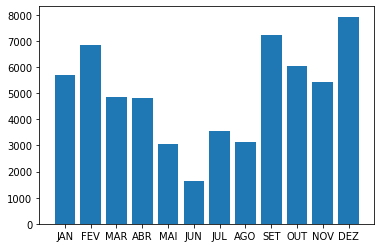

In [33]:
#COMUNICAÇÃO COM O CLIENTE - PARA SABER COMO FORAM AS VENDAS DE UM DETERMINADO
#PRODUTO EM CADA MÊS DE 2018, BASTA SELECIONAR O CÓDIGO DO PRODUTO
print('Escolha o produto que deseja fazer a análise financeira de vendas anual.')
print(tabela_produtos_codigo.to_records(index=False))
escolha_produto = int(input('Digite o código do produto:'))

#IMPLEMENTAÇÃO DE UMA ROTINA DE ACESSO A CADA TABELA MENSAL PARA SELECIONAR
#O PRODUTO ESCOLHIDO E REALIZAR A OPERAÇÃO DE SOMA TOTAL DO MÊS
tabela_tempo_mes_produto = tabela_tempo_mes_final.copy()
meses = ['JAN', 'FEV', 'MAR', 'ABR', 'MAI', 'JUN', 'JUL', 'AGO', 'SET', 'OUT', 'NOV', 'DEZ']
tabela_produto_ano = []
i=0
while i < 12:
  tabela_tempo_mes_produto[i] = tabela_tempo_mes_produto[i].loc[tabela_tempo_mes_produto[i]['CODIGO'] == escolha_produto]
  valor_mes = tabela_tempo_mes_produto[i]['TOTAL'].sum()
  tabela_produto_ano.append(valor_mes)
  i += 1

print('A venda do produto escolhido de Janeiro a Dezembro de 2018 foi')

plt.bar(meses, tabela_produto_ano)
plt.show()

